# Genere una Bodega de datos que permita responder al menos 15 preguntas elaboradas por el equipo. (Adjunte las 15 preguntas con las 15 consultas SQL que respondan a las preguntas y la respectiva gráfica)

A partir de la depuración de datos del punto 1, se cargaron las tablas a BigQuery formando así la bodega de datos, a continuación se observan las tablas principales y auxiliares:

In [23]:
import json
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import plotly.plotly as py
import cufflinks as cf

In [50]:
data1 = pd.read_json("Total_DB.json")
Age = pd.read_csv("Age.csv")
Country = pd.read_csv("Country.csv")
Experience = pd.read_csv("Experience.csv")
Salary = pd.read_csv("Salary.csv")
Gender = pd.read_csv("Gender.csv")

In [51]:
A = pd.merge(data1, Age, on='Id_Age', how='left') #Unión del DataFrame principal con las descripciones de los campos
B = pd.merge(A, Country, on='Id_Country', how='left')
C = pd.merge(B, Experience, on='Id_Experience', how='left')
D = pd.merge(C, Salary, on='Id_Salary', how='left')
data = pd.merge(D, Gender, on='Id_Gender', how='left')
data

,AngularJS,C,CPlusPlus,CSS,CSharp,HTML5,Id_Age,Id_Country,Id_Experience,Id_Gender,...,SQL,SQL_Server,TypeScript,Year,jQuery,Desc_Age,Des_Country,Desc_Experience,Desc_Salary,Desc_Gender
0,None,None,None,None,None,None,NaN,93.0,NaN,NaN,...,None,None,None,2013,None,NaN,India,NaN,NaN,NaN
1,None,None,None,None,None,None,4.0,42.0,NaN,2.0,...,None,None,None,2016,None,30-34,Canada,NaN,NaN,Male
2,None,None,None,None,None,None,5.0,152.0,NaN,2.0,...,None,None,None,2016,None,35-39,Norway,NaN,NaN,Male
3,None,None,None,None,None,None,2.0,136.0,NaN,2.0,...,None,None,None,2016,None,20-24,Mongolia,NaN,NaN,Male
4,None,None,None,None,None,None,2.0,78.0,NaN,2.0,...,None,None,None,2016,None,20-24,Germany,NaN,NaN,Male
5,None,None,None,None,None,None,NaN,78.0,NaN,NaN,...,None,None,None,2016,None,NaN,Germany,NaN,NaN,NaN
6,None,None,None,None,None,None,3.0,213.0,NaN,2.0,...,None,None,None,2016,None,25-29,United States of America,NaN,NaN,Male
7,None,None,None,None,None,None,4.0,212.0,NaN,2.0,...,None,None,None,2016,None,30-34,United Kingdom,NaN,NaN,Male
8,None,None,None,None,None,None,4.0,NaN,NaN,2.0,...,None,None,None,2016,None,30-34,NaN,NaN,NaN,Male
9,None,None,None,None,None,None,3.0,49.0,NaN,2.0,...,None,None,None,2016,None,25-29,China,NaN,NaN,Male


## PREGUNTAS

### 1.  Cuales son los 5 lenguajes de programación más usados en el año 2017 y 2011?

Text(0.5,1,'5 lenguajes de programación más utilizados en el año 2011')

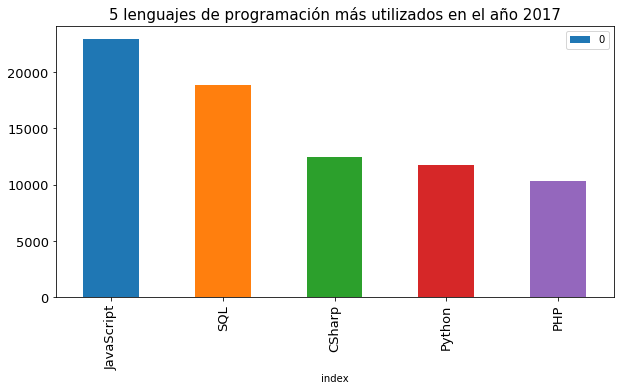

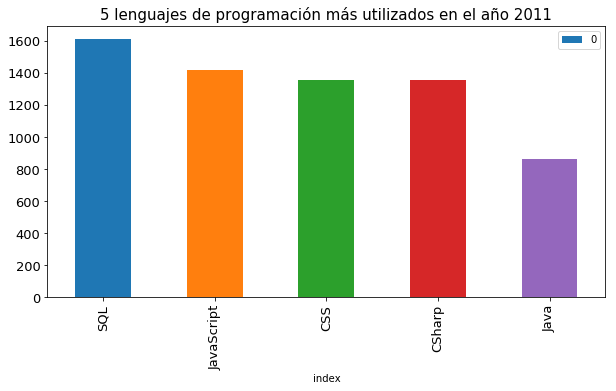

In [358]:
dataset1 = data[['Year','AngularJS','C', 'CPlusPlus','CSS','CSharp','HTML5','Java','JavaScript','Nodejs','ObjectiveC','PHP','Perl','Python','Ruby','SQL','SQL_Server','TypeScript','jQuery']]

data2017 = dataset1[dataset1["Year"] == 2017].count().sort_values(ascending = False).reset_index()
datos2017 =data2017.drop([0],axis=0).head(5).plot.bar(x = "index", y = 0, figsize=(10,5), fontsize=13)
plt.title('5 lenguajes de programación más utilizados en el año 2017',fontsize=15)

data2011 = dataset1[dataset1["Year"] == 2011].count().sort_values(ascending = False).reset_index()
datos2011 =data2011.drop([0],axis=0).head(5).plot.bar(x = "index", y = 0, figsize=(10,5), fontsize=13)
plt.title('5 lenguajes de programación más utilizados en el año 2011',fontsize=15)

### 2. Cuáles fueron los 8 países con más preguntas durante el año 2013?

Text(0.5,0,'Número de personas encuestadas')

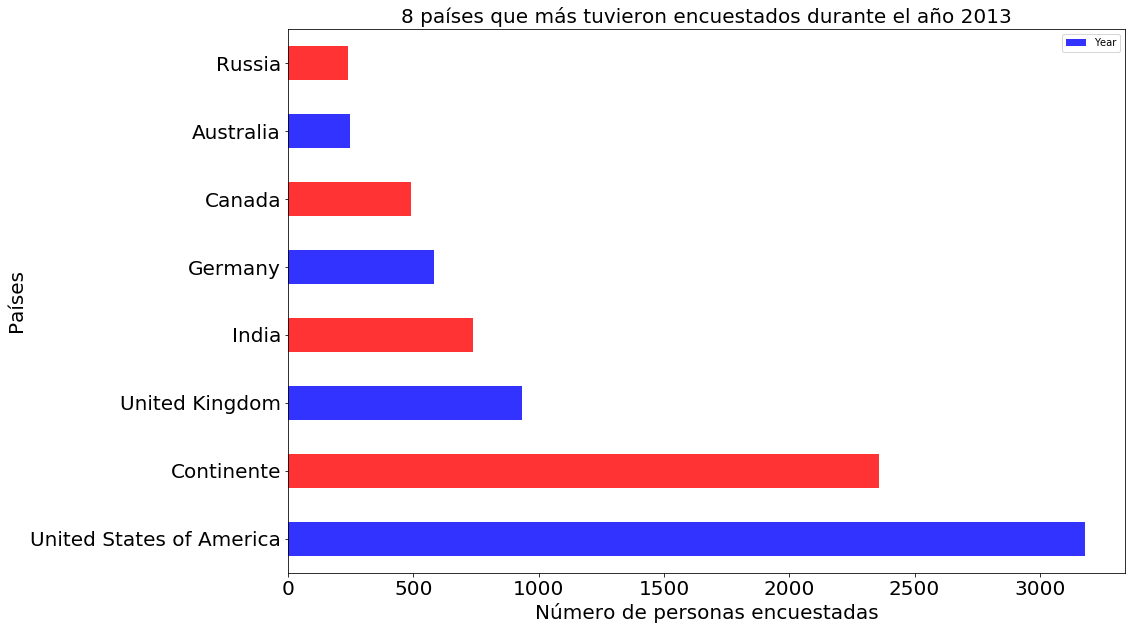

In [399]:
datos= data.loc[:, ['Year', 'Des_Country']]
Paises2013 = datos[datos["Year"] == 2013].groupby(['Des_Country']).count()
Paises = Paises2013.sort_values('Year',ascending=False).head(8)
Paises.plot(kind='barh', alpha = 0.8, color='br',figsize=(15,10),fontsize=20)
plt.title('8 países que más tuvieron encuestados durante el año 2013',fontsize=20)
plt.ylabel("Países", fontsize=20)
plt.xlabel("Número de personas encuestadas", fontsize=20)

### 3. Cuántas fueron las preguntas realizadas en Estados Unidos por año?

In [363]:
datos= data.loc[:, ['Year', 'Des_Country']]
Paises2013 = datos[datos["Des_Country"] == 'United States of America'].groupby(['Year']).count()
Paises2013

,Des_Country
Year,
2011,1037
2012,1785
2013,3181
2014,2128
2015,4745
2016,13539
2017,11508


/home/judarangobu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0,0.5,'Número de preguntas')

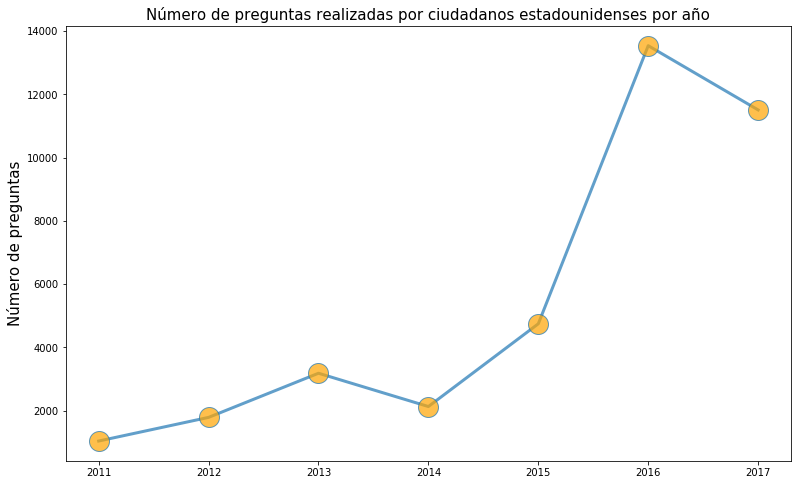

In [373]:
plt.figure(figsize=(13,8))
plt.plot(Paises2013, '-o', ms=20, lw=1, alpha=0.7, mfc='orange',linewidth=3)
plt.title("Número de preguntas realizadas por ciudadanos estadounidenses por año", fontsize=15)  # Establece el título del gráfico
plt.ylabel("Número de preguntas", fontsize=15)   # Establece el título del eje y

### 4. Cuántas personas por género presentan salarios entre \$140.001-\$ 160.000, \$ 160.001-\$ 180.000 y \$ 180.001-\$ 200.000?

In [266]:
Salario =pd.crosstab(data.Desc_Salary, data.Desc_Gender).drop(["Null"], axis=1).loc[['140.001-160.000','160.001-180.000','180.001-200.000']] # .reset_index() #.loc[[3,4,5]].drop(["Null"], axis=1)
Salario

Desc_Gender,Female,Male
Desc_Salary,,
140.001-160.000,66,1761
160.001-180.000,28,1017
180.001-200.000,30,889


Text(0,0.5,'Número de encuestados')

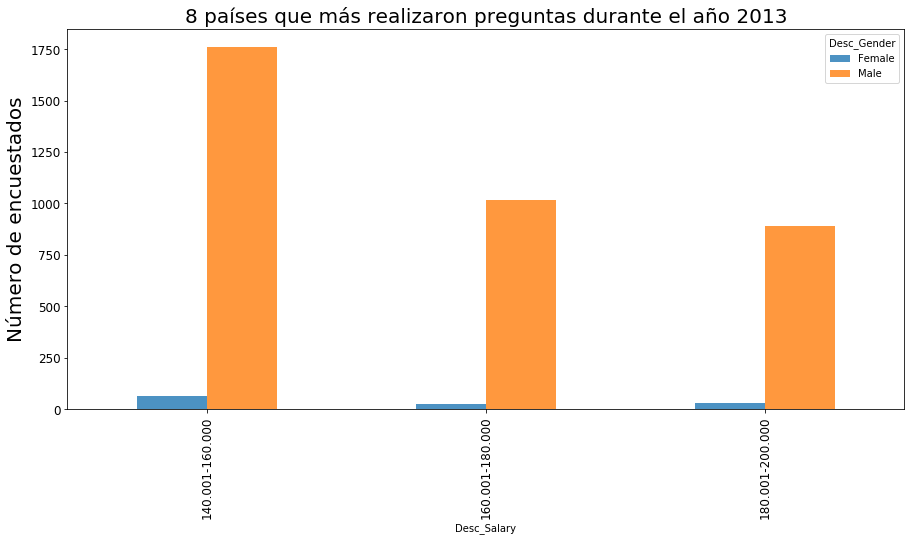

In [397]:
Salario.plot(kind='bar', alpha = 0.8,figsize=(15,7),fontsize=12)
plt.title('8 países que más realizaron preguntas durante el año 2013',fontsize=20)
plt.ylabel("Número de encuestados", fontsize=20)

### 5. Cuántos programadores trabajaban con los lenguajes: C, C++, Java Script, Python y SQL entre el 2011 y 2017?

In [15]:
lenguajes = data[['Year','C','CPlusPlus','JavaScript','Python','SQL']]
lenguajes2 = lenguajes.groupby(['Year']).count()
lenguajes2.reset_index()

,Year,C,CPlusPlus,JavaScript,Python,SQL
0,2011,741,740,1419,575,1613
1,2012,1484,1526,3127,1210,3294
2,2013,1437,1697,4736,1881,4594
3,2014,1174,1418,3783,1473,3467
4,2015,3613,4530,11963,5239,9440
5,2016,4521,9589,27385,12282,24248
6,2017,5591,8194,22974,11771,18812


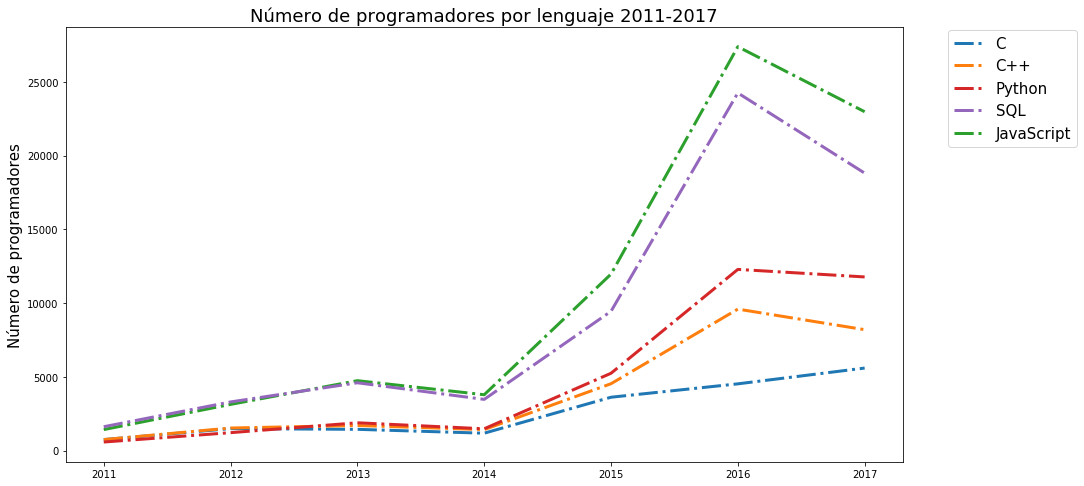

In [157]:
plt.figure(figsize=(15, 8))

p1 = plt.plot(lenguajes2,linestyle='dashdot', markersize=12, linewidth=3)
plt.title("Número de programadores por lenguaje 2011-2017", fontsize=18)  # Establece el título del gráfico
plt.ylabel("Número de programadores", fontsize=15)   # Establece el título del eje y
plt.legend((p1[0], p1[1], p1[3], p1[4], p1[2]), ('C', 'C++', 'Python', 'SQL', 'JavaScript'),
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2, prop={'size': 15}) # p1[0] quiere decir que me coja el primer valor q va a graficar y le asigne el otro nombre en este caso café


### 6. Cuáles fueron los 6 lenguajes que más usaron los encuestados con un salario entre \$ 180.001 y \$ 200.000 entre los años 2011 y 2017?

Text(0.5,1,'Lenguajes que más usaron los encuestados con un salario entre $180.001 y $ 200.000 entre los años 2011 y 2017')

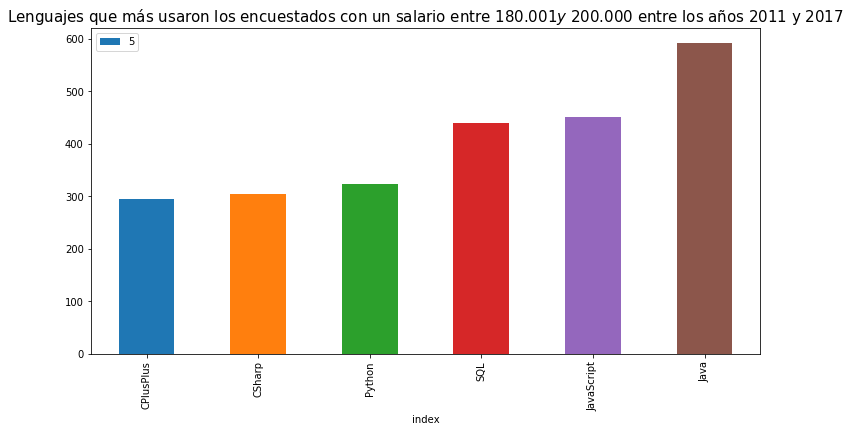

In [404]:
dataset2= data[['Desc_Salary','AngularJS','C', 'CPlusPlus','CSS','CSharp','HTML5','Java','JavaScript','Nodejs','ObjectiveC','PHP','Perl','Python','Ruby','SQL','SQL_Server','TypeScript','jQuery']]
sala = dataset2.groupby(['Desc_Salary']).count().reset_index().loc[[5]].T.reset_index()
sala2 = sala.drop([0],axis=0).sort_values(5,ascending = True).tail(6)
sala2.plot.bar(x = "index", y = 5,figsize=(12, 6))
plt.title("Lenguajes que más usaron los encuestados con un salario entre $180.001 y $ 200.000 entre los años 2011 y 2017", fontsize=15)

### 7.Cuáles son los 10 paises donde más utilizaron python desde el 2011 hasta el 2017?

In [5]:
dataset3= (data[['Des_Country','Python']]).groupby(['Des_Country']).count().sort_values('Python',ascending = False).head(10)
dataset3

,Python
Des_Country,
United States of America,10042
United Kingdom,3033
Germany,2487
India,1924
Canada,1629
France,1110
Continente,879
Poland,879
Russia,827


Text(0.5,0,'Número de personas encuestadas')

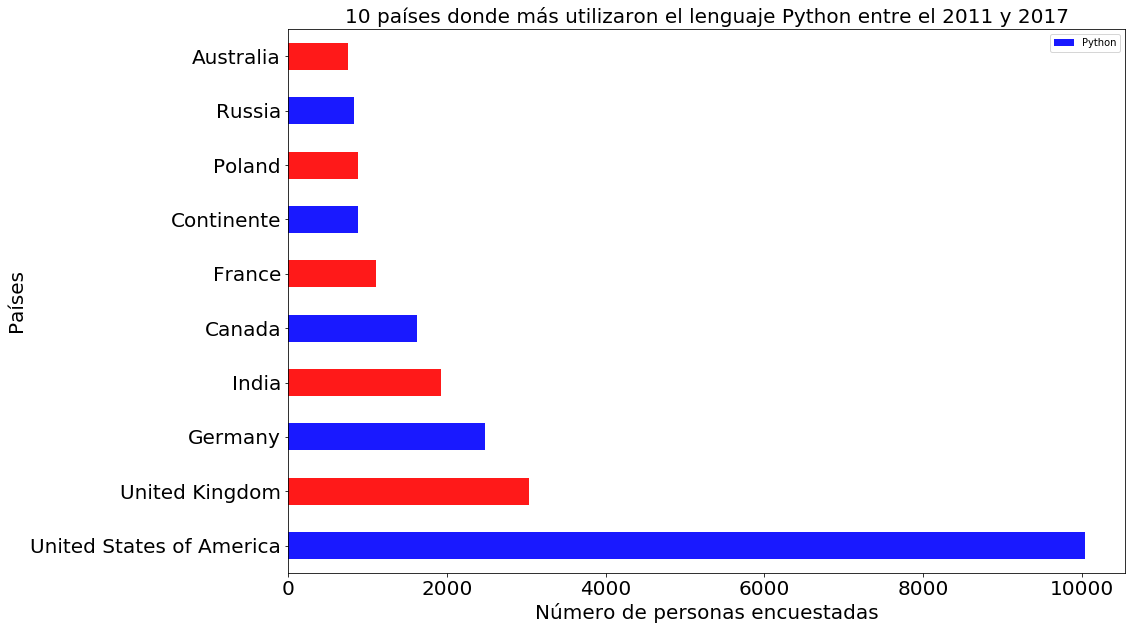

In [7]:
dataset3.plot(kind='barh', alpha = 0.9, color='br',figsize=(15,10),fontsize=20)
plt.title('10 países donde más utilizaron el lenguaje Python entre el 2011 y 2017',fontsize=20)
plt.ylabel("Países", fontsize=20)
plt.xlabel("Número de personas encuestadas", fontsize=20)

### 8. Cuáles lenguajes utilizaron los encuestados de Colombia durante el año 2016?

In [13]:
dataset4 = data[['Year','Des_Country','AngularJS','C', 'CPlusPlus','CSS','CSharp','HTML5','Java','JavaScript','Nodejs','ObjectiveC','PHP','Perl','Python','Ruby','SQL','SQL_Server','TypeScript','jQuery']]
Colombia = dataset4[dataset4["Des_Country"] == 'Colombia'].groupby(['Year']).count().drop(["Des_Country"], axis=1).reset_index().loc[[2]].T.reset_index().drop([0],axis=0).sort_values(2,ascending = False).head(14)
Colombia

,index,2
7,Java,67
8,JavaScript,57
15,SQL,38
11,PHP,26
13,Python,23
1,AngularJS,18
5,CSharp,17
9,Nodejs,16
16,SQL_Server,14
14,Ruby,9


Text(0.5,0,'Número de personas encuestadas')

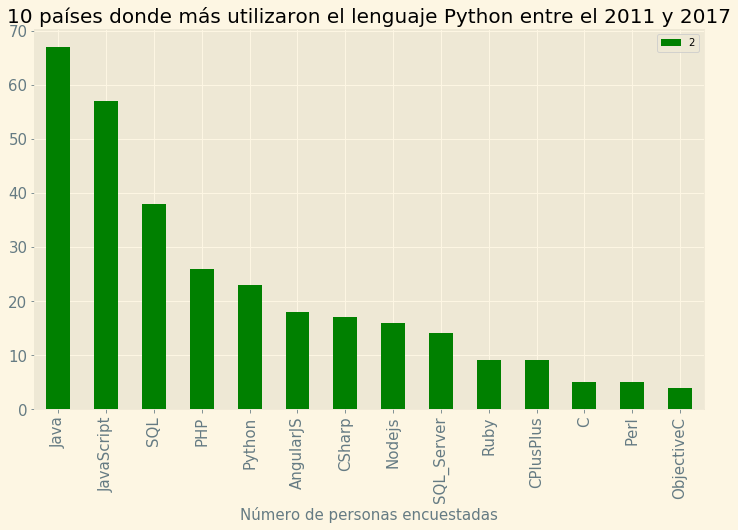

In [46]:
plt.style.use('Solarize_Light2')
Colombia.plot.bar(x = "index", y = 2,figsize=(12,7),fontsize=15, color= 'green');
plt.title('10 países donde más utilizaron el lenguaje Python entre el 2011 y 2017',fontsize=20)
plt.xlabel("Número de personas encuestadas", fontsize=15)

### 9. Cuántas personas encuestadas utilizaron los lenguajes C, C++, Objective-C, C# durante el año 2016 que tuvieran experiencia entre 2 y 5 años y un salario entre \$ 20.001 y \$ 40.000?

In [52]:
dataset5 = data[['Year','Desc_Experience','Desc_Salary','C', 'CPlusPlus','ObjectiveC','CSharp']]
experiencia = dataset5[(dataset5['Year'] == 2016) & (dataset5['Desc_Experience'] == '2 - 5 years') & (dataset5['Desc_Salary'] == '20.001-40.000')].groupby(['Year']).count().drop(['Desc_Salary','Desc_Experience'], axis=1)
experiencia

,C,CPlusPlus,ObjectiveC,CSharp
Year,,,,
2016,188,418,192,740


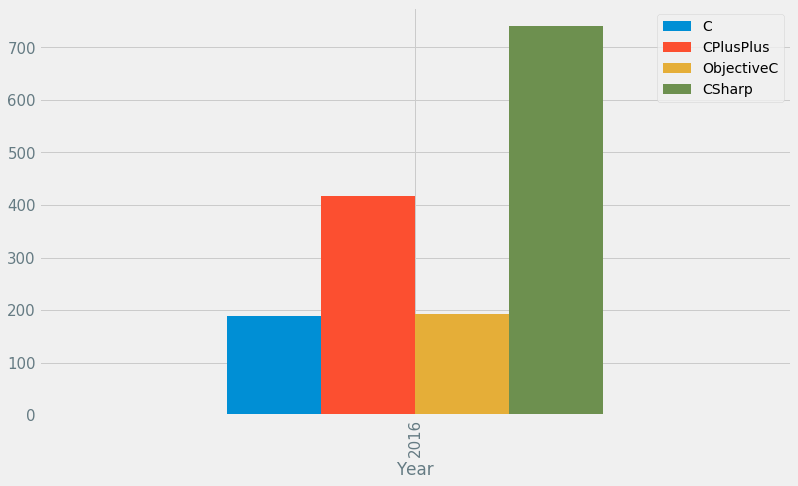

In [55]:
plt.style.use('fivethirtyeight')
experiencia.plot.bar(figsize=(12,7),fontsize=15);

### 10. Cuántos encuestados había por rango salarial que utilizaron el lenguaje JavaScript en el 2014 y 2016?

In [136]:
dataset6 = data[['Year','Desc_Salary', 'JavaScript']]
java = dataset6[(dataset6['Year'] == 2016)].groupby(['Desc_Salary']).count()
java1 = dataset6[(dataset6['Year'] == 2014)].groupby(['Desc_Salary']).count()
J = pd.merge(java, java1, on='Desc_Salary', how='left').fillna(0).drop(["Year_x","Year_y"], axis=1) # Se unen los resultados de las consultas en una tabla y se eliminan las dos filas de años
J.columns = ['Año_2016','Año_2014'] #definición de nombre de las columnas
javaS= J.reset_index().loc[[0,6,7,8,9,1,2,3,4,5,10,11,12]] #Se ordenan las columnas con loc ya que presentan #s y int 
jv= javaS[['Año_2016', 'Año_2014']]
javaS

,Desc_Salary,Año_2016,Año_2014
0,0-20.000,6745,525.0
6,20.001-40.000,4189,408.0
7,40.001-60.000,3825,453.0
8,60.001-80.000,3151,395.0
9,80.001-100.000,2051,341.0
1,100.001-120.000,1583,242.0
2,120.001-140.000,862,103.0
3,140.001-160.000,537,136.0
4,160.001-180.000,215,0.0
5,180.001-200.000,422,0.0


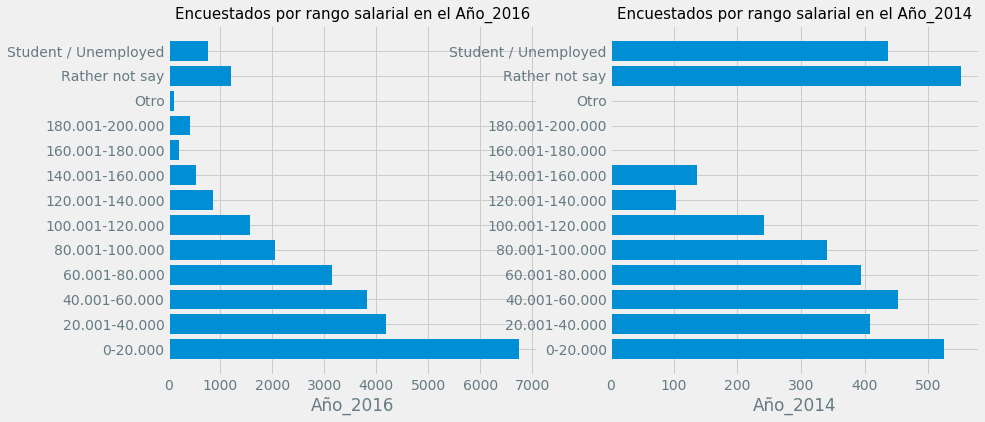

In [138]:
plt.figure(figsize=(20, 6))
for index, colname in enumerate(jv.columns):
    plt.subplot(1, 3, index+1)
    ## >>>>>
    plt.barh(range(13), jv[colname])
    ## <<<<<
    plt.yticks(range(13), list(javaS.Desc_Salary), rotation='horizontal')
    plt.title('Encuestados por rango salarial en el ' + colname ,fontsize=15)
    plt.xlabel(colname);

### 11. Cuántos encuestados había por rango de experiencia que utilizaron el lenguaje JavaScript en el 2014 y 2016?

In [140]:
dataset6 = data[['Year','Desc_Experience', 'JavaScript',]]
expe = dataset6[(dataset6['Year'] == 2016)].groupby(['Desc_Experience']).count()
expe1 = dataset6[(dataset6['Year'] == 2014)].groupby(['Desc_Experience']).count()
e = pd.merge(expe, expe1, on='Desc_Experience', how='left') .fillna(0).drop(["Year_x","Year_y"], axis=1) # Se unen los resultados de las consultas en una tabla y se eliminan las dos filas de años
e.columns = ['Año_2016','Año_2014'] #definición de nombre de las columnas
exper= e.reset_index().loc[[4,0,2,3,1]] #Se ordenan las columnas con loc ya que presentan #s y int 
df= exper[['Año_2016', 'Año_2014']]
exper

,Desc_Experience,Año_2016,Año_2014
4,Less than 1 year,1184,0.0
0,1 - 2 years,3079,383.0
2,2 - 5 years,8729,0.0
3,6 - 10 years,6934,0.0
1,11+ years,7313,1122.0


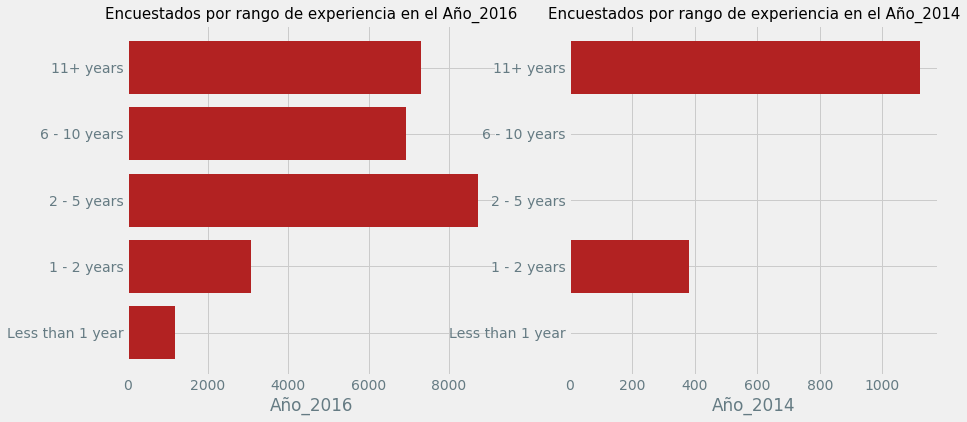

In [146]:
plt.figure(figsize=(20, 6))
for index, colname in enumerate(df.columns):
    plt.subplot(1, 3, index+1)
    ## >>>>>
    plt.barh(range(5), df[colname], color='firebrick')
    ## <<<<<
    plt.yticks(range(5), list(exper.Desc_Experience), rotation='horizontal')
    plt.title('Encuestados por rango de experiencia en el ' + colname ,fontsize=15)
    plt.xlabel(colname);

### 12. Cuál es la experiencia de los encuestados por cada uno de los siguientes rangos salariales que utilizaron el lenguaje Python en el año 2017: \$ 40.001-\$ 60.001, \$ 60.001-\$ 80.000 y \$ 80.001-\$ 100.000?

In [439]:
dataset7 = data[['Year','Desc_Experience', 'Python','Desc_Salary']]
python1 = dataset7[(dataset7['Year'] == 2017) & (dataset7['Python'])].drop(["Year","Python"], axis=1)
python2= pd.crosstab(python1.Desc_Salary,python1.Desc_Experience).loc[['40.001-60.000','60.001-80.000','80.001-100.000']].T
pyt = python2.loc[['Less than 1 year','1 - 2 years','2 - 5 years','6 - 10 years','11+ years']]
pyt

Desc_Salary,40.001-60.000,60.001-80.000,80.001-100.000
Desc_Experience,,,
Less than 1 year,2,1,1
1 - 2 years,13,4,2
2 - 5 years,147,82,52
6 - 10 years,228,155,94
11+ years,324,300,187


Text(0,0.5,'Número de encuestados que utilizaron el lenguaje Python')

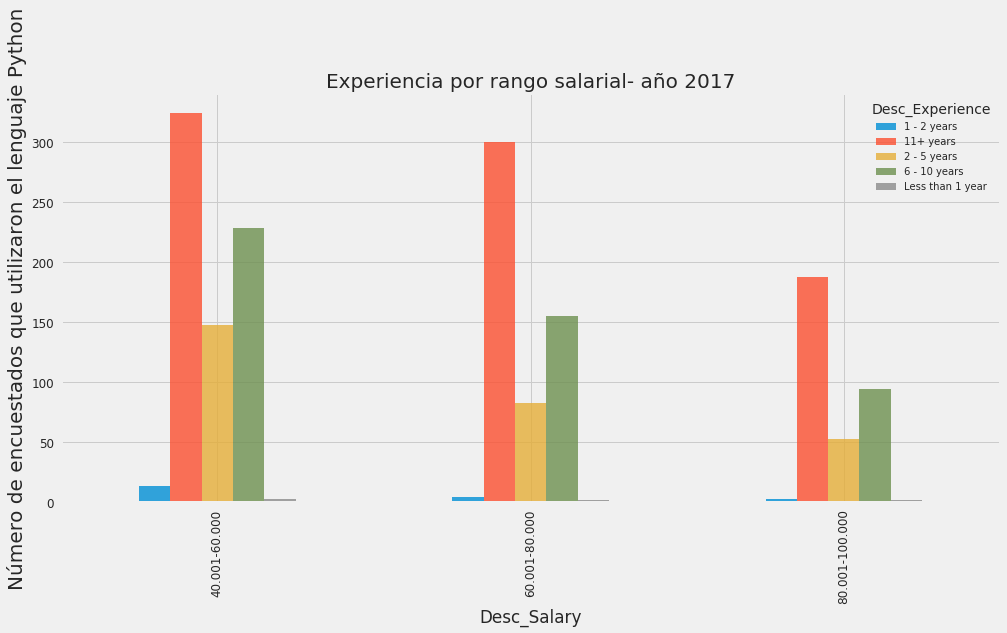

In [452]:
pyt.plot(kind='bar', alpha = 0.8,figsize=(15,7),fontsize=12)
plt.title('Experiencia por rango salarial- año 2017',fontsize=20)
plt.ylabel("Número de encuestados que utilizaron el lenguaje Python", fontsize=20)

### 13. Cuál fue la distribución de la experiencia de las mujeres encuestadas en el año 2015?

In [180]:
dataset8 = data[['Year','Desc_Gender', 'Desc_Experience']]
data8 = dataset8[(dataset8['Year'] == 2015) & (dataset8['Desc_Gender']=="Female")].drop(["Year"], axis=1)
mujer= data8.groupby('Desc_Experience').count().reset_index().loc[[4,0,3,1]]
mj= mujer.reset_index().drop(['index'],axis=1)
mj

,Desc_Experience,Desc_Gender
0,Less than 1 year,239
1,1 - 2 years,310
2,6 - 10 years,223
3,11+ years,141


Text(0,0.5,'Número de encuestados')

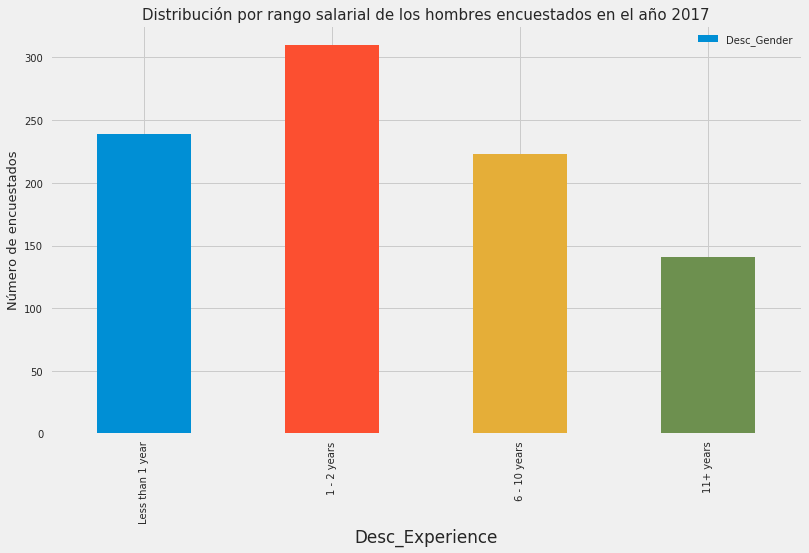

In [393]:
mj.plot.bar(x = "Desc_Experience", y = "Desc_Gender",figsize=(12,7),fontsize=10)
plt.title('Distribución por rango salarial de los hombres encuestados en el año 2017',fontsize=15, size= 15)
plt.ylabel("Número de encuestados", fontsize=13)

### 14. Cuál fue la distribución del salario de los hombres encuestados en el año 2017?

In [297]:
dataset9 = data[['Year','Desc_Gender', 'Desc_Salary']]
data9 = dataset9[(dataset9['Year'] == 2017) & (dataset9['Desc_Gender']=="Male")].drop(["Year"], axis=1)
hombre= data9.groupby('Desc_Salary').count().reset_index().loc[[0,6,7,8,9,1,2,3,4,5]]
hombre

,Desc_Salary,Desc_Gender
0,0-20.000,2022
6,20.001-40.000,1962
7,40.001-60.000,2337
8,60.001-80.000,1622
9,80.001-100.000,1018
1,100.001-120.000,753
2,120.001-140.000,500
3,140.001-160.000,280
4,160.001-180.000,124
5,180.001-200.000,48


Text(0,0.5,'Número de encuestados')

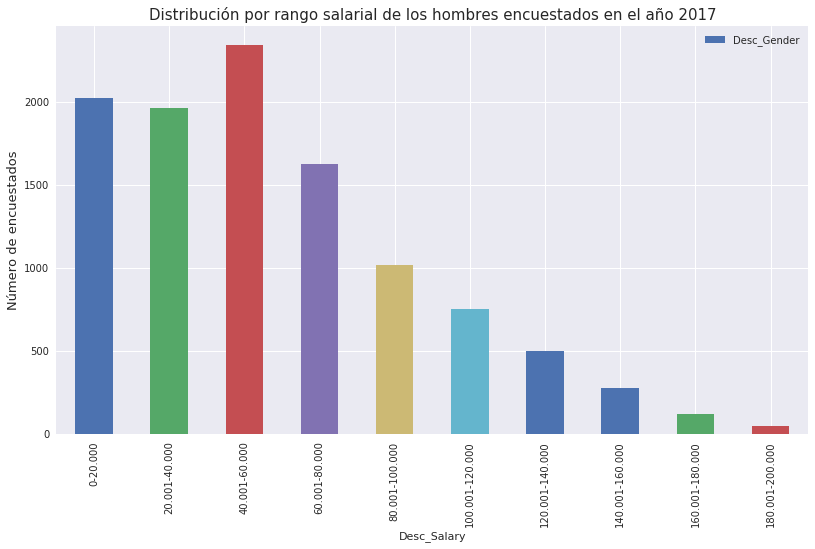

In [302]:
hombre.plot.bar(x = "Desc_Salary", y = "Desc_Gender",figsize=(12,7),fontsize=10)
plt.title('Distribución por rango salarial de los hombres encuestados en el año 2017',fontsize=15, size= 15)
plt.ylabel("Número de encuestados", fontsize=13)

### 15. Cuál es la distribución por género de las personas encuestadas en el año 2014 para los países de Argentina, Brasil y México?

In [281]:
datast = data[['Year','Desc_Gender', 'Des_Country']]
paises= datast[(datast['Year'] == 2014)].drop(["Year"], axis=1)
paises1 =pd.crosstab(paises.Des_Country, paises.Desc_Gender).loc[['Argentina','Brazil','Mexico']].drop(["Null"], axis=1) # .reset_index() #.loc[[3,4,5]].drop(["Null"], axis=1)
paises1

Desc_Gender,Female,Male
Des_Country,,
Argentina,3,27
Brazil,2,91
Mexico,0,33


Text(0,0.5,'Número de encuestados')

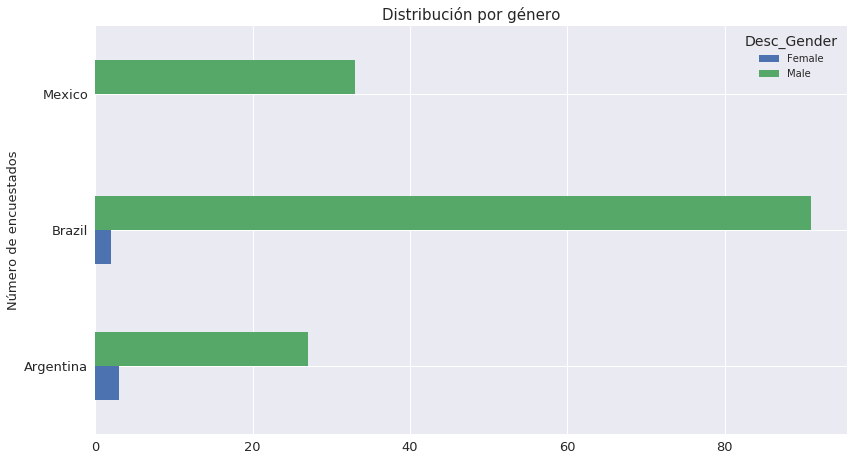

In [295]:
plt.style.use('seaborn')
paises1.plot(kind='barh',figsize=(12,7),fontsize=13)
plt.title('Distribución por género',fontsize=15, size= 15)
plt.ylabel("Número de encuestados", fontsize=13)